## Purpose

Transform a Python function into a "black box" that can be seamlessly integrated and used within PyTorch, ensuring compatibility and avoiding conflicts with `torch.compile`.

Example with an image processing by numpy

In [3]:
import numpy as np
import torch
from torchvision.transforms.functional import to_pil_image, pil_to_tensor
from scipy.ndimage import gaussian_filter

In [6]:
@torch.library.custom_op("mylib::blur_numpy", mutates_args=())
def blur_numpy(pic: torch.Tensor, sigma: float) -> torch.Tensor:
    img = pic.cpu().numpy()
    blurred = gaussian_filter(img, sigma=sigma)
    return torch.from_numpy(blurred).to(pic.device, pic.dtype)

Register Fake kernel for "torch.complie' can be used

In [7]:
@blur_numpy.register_fake
def _(pig, sigma):
    return pig.clone()

In [8]:
@torch.compile(fullgraph=True)
def f(img):
    return blur_numpy(img, sigma=1.5)
img = torch.rand(3, 64, 64)
blurred_img = f(img)   


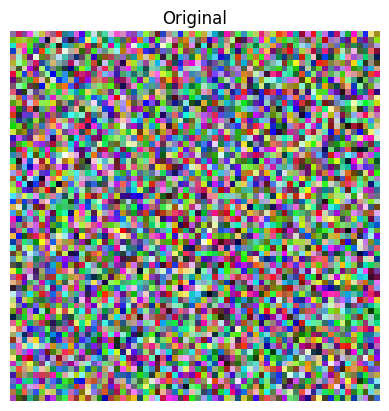

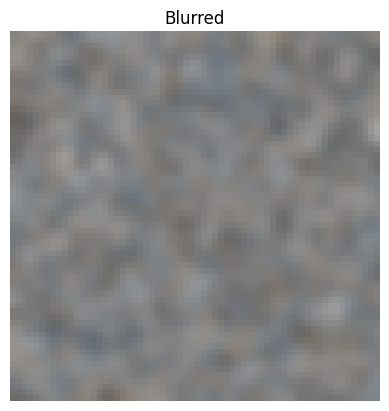

In [9]:
import matplotlib.pyplot as plt

def display(img):
    plt.imshow(img.permute(1, 2, 0).cpu().numpy())
    plt.axis("off")

display(img)
plt.title("Original")
plt.show()

display(blurred_img)
plt.title("Blurred")
plt.show()
